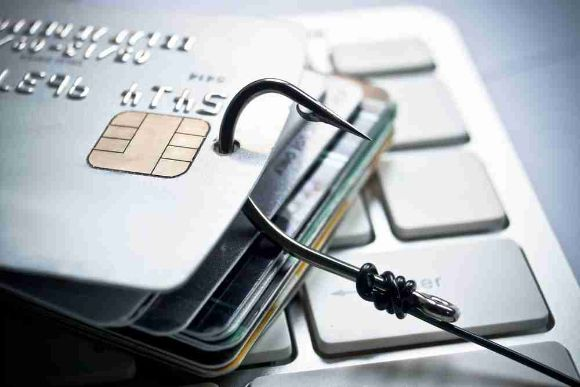

In [113]:
from IPython.display import Image
Image("fraud_small.jpg",width=400,height=350)

Data Description:

The dataset contains two-days credit card transactions made in September 2013 by European cardholders. The dataset is highly unbalanced with a low percentage of fraudulent transactions within several records of normal transactions.

The negative class(No Frauds) accounts for 99.83% of the dataset. The positive class (frauds) account for 0.172% (492 frauds out of 284,807 transactions) of all transactions.

Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. 
Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. Feature 'Class' is the target variable with value 1 in case of fraud and 0 otherwise.

In [55]:
#import libraries
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from collections import Counter
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import time
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
import seaborn as sns
import matplotlib.patches as mpatches
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt # Plot the graphes
%matplotlib inline
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import preprocessing
import seaborn as sns
from sklearn.preprocessing import StandardScaler as ss
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
sns.set()
import sklearn.metrics as metrics
import xgboost as xgb
from sklearn.preprocessing import StandardScaler 
from sklearn.feature_selection import SelectFromModel
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_predict

In [56]:
from keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Dropout,Input
import tensorflow as tf
from keras import regularizers
from keras.callbacks import ModelCheckpoint
from keras import models
from imblearn.over_sampling import SMOTE

In [57]:
fraud_data=pd.read_csv("creditcard.csv")
fraud_data.shape

(284807, 31)

<b>EDA:Exploratory Data Analysis</b>

In [18]:
fraud_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
fraud_data.isnull().values.any()

False

Text(0, 0.5, 'frequency')

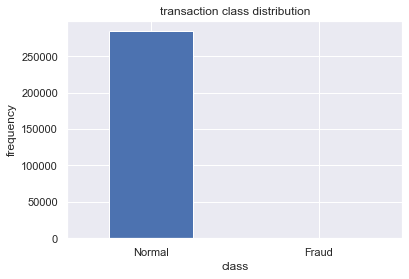

In [3]:
LABELS = ["Normal", "Fraud"]
count_classes=pd.value_counts(fraud_data['Class'],sort=True)
count_classes.plot(kind='bar',rot=0)
plt.title("transaction class distribution")
plt.xticks(range(2),LABELS)
plt.xlabel("class")
plt.ylabel("frequency")

Note: Notice how imbalanced is our original dataset! Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud!

In [10]:
fraud_data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [58]:
scaler = StandardScaler()
fraud_data['normalize_amount']=scaler.fit_transform(fraud_data['Amount'].values.reshape(-1,1))

In [59]:
data=fraud_data.drop(['Amount','Time'],axis=1)

In [60]:
X_data=data.drop(['Class'],axis=1)
y_label=data['Class']

In [61]:
#split data into training set(%80) and test set(%30)
X_train,X_test,y_train,y_test=train_test_split(X_data,y_label,stratify=y_label,test_size=.3,random_state=500)
print("training data is",X_train.shape)
print("test data is", y_train.shape)

training data is (199364, 29)
test data is (199364,)


In [62]:
input_dim=X_train.shape[1]

In [63]:
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [64]:
#apply ADASYN oversampling
#ada=ADASYN(ranedom_state=42)
#print('original dataset shape {}'.format(Counteer(y_train)))

X_res,y_res= SMOTE().fit_sample(X_train,y_train)
#X_res,y_res=ada.fit_sample(X_train,y_train)
print('Resampled dataset shape {}'.format(Counter(y_res)))

Resampled dataset shape Counter({0: 199020, 1: 199020})


In [65]:
X_train=X_res
y_train=y_res

<b>Build deep learning DNN model</b>

In [ ]:
model=Sequential([
    Dense(units=28,input_dim=input_dim,activation='relu'),
    Dense(units=22,activation='relu'),
    Dropout(0.5),
    Dense(18,activation='relu'),
    Dense(6,activation='relu'),
    Dense(1,activation='sigmoid'),
])

In [74]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 18)                540       
_________________________________________________________________
dense_25 (Dense)             (None, 26)                494       
_________________________________________________________________
dropout_4 (Dropout)          (None, 26)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 22)                594       
_________________________________________________________________
dense_27 (Dense)             (None, 22)                506       
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 23        
Total params: 2,157
Trainable params: 2,157
Non-trainable params: 0
____________________________________________________

In [75]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=[tf.keras.metrics.Accuracy()])
model.fit(X_train,y_train,batch_size=30,epochs=10)

Epoch 1/10
13268/13268 [==============================] - 9s 682us/step - loss: 0.0054 - accuracy: 0.2907
Epoch 2/10
13268/13268 [==============================] - 9s 661us/step - loss: 0.0052 - accuracy: 0.2403
Epoch 3/10
13268/13268 [==============================] - 9s 670us/step - loss: 0.0048 - accuracy: 0.2278
Epoch 4/10
13268/13268 [==============================] - 9s 674us/step - loss: 0.0044 - accuracy: 0.2840
Epoch 5/10
13268/13268 [==============================] - 9s 661us/step - loss: 0.0043 - accuracy: 0.2171
Epoch 6/10
13268/13268 [==============================] - 9s 716us/step - loss: 0.0039 - accuracy: 0.2609
Epoch 7/10
13268/13268 [==============================] - 10s 773us/step - loss: 0.0038 - accuracy: 0.2539
Epoch 8/10
13268/13268 [==============================] - 9s 675us/step - loss: 0.0034 - accuracy: 0.3050
Epoch 9/10
13268/13268 [==============================] - 10s 717us/step - loss: 0.0036 - accuracy: 0.2544
Epoch 10/10
13268/13268 [===================

In [76]:
print("DNN")
print("AUC score")
score=model.evaluate(X_test,y_test)
score

DNN
AUC score
2671/2671 [==============================] - 1s 484us/step - loss: 0.0186 - accuracy: 0.6093


[0.018606198951601982, 0.6092599630355835]

In [77]:
prediction_nn=model.predict(X_test)
print("Confusion metrix")
print(metrics.confusion_matrix(y_test,prediction_nn.round()))

Confusion metrix
[[85224    71]
 [   29   119]]


In [78]:
print('Deep Neural Network:')
print(classification_report(y_test,prediction_nn.round()))

Deep Neural Network:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.63      0.80      0.70       148

    accuracy                           1.00     85443
   macro avg       0.81      0.90      0.85     85443
weighted avg       1.00      1.00      1.00     85443



<b>Build encoding model</b>

<b>Semi-Supervised Learning</b> is combination of supervised and unsupervised learning processes in which the unlabelled data is used for training a model as well. 
In this approach, the properties of unspervised learning are used to learn the best possible representation of data and the properties of supervised learning are used to learn the relationships in the representations which are then used to make predictions.

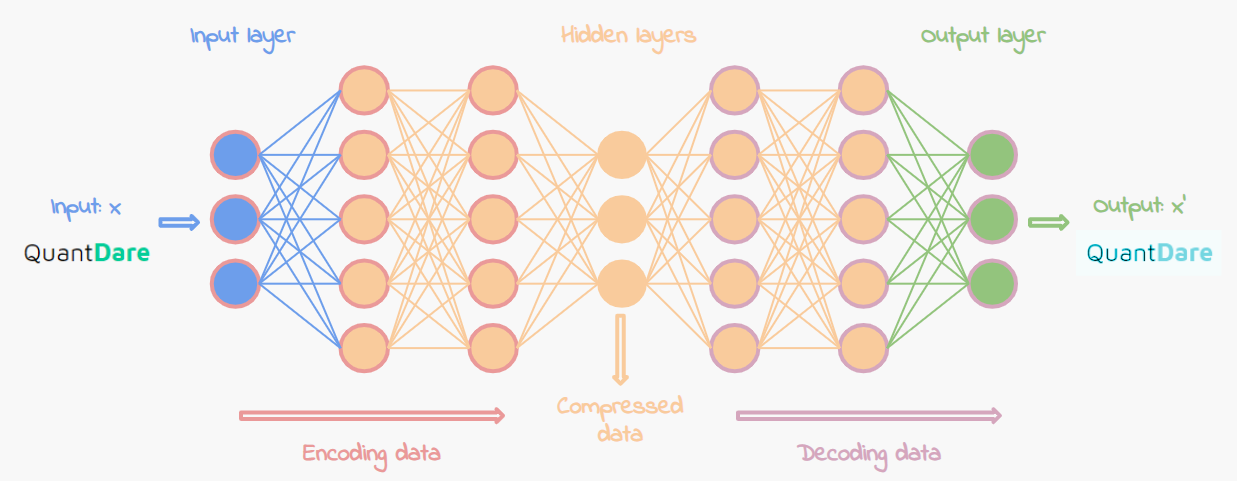

In [111]:
Image("autoencoder.png",width=500,height=350)

Idea:
we give a lot of one-class examples (normal transactions) to a model and it learns (somewhat) how to discriminate whether or not new examples belong to that same class.
However, We really don't know what the original features look like.



In [27]:
#split data into training set(%80) and test set(%30)
X_train,X_test=train_test_split(data,test_size=.3,random_state=500)

In [28]:
#remove outlier
X_train=X_train[X_train.V8!=-73.21671845526741]

In [29]:
X_train=X_train[X_train.Class==0]
X_train=X_train.drop(['Class'], axis=1)

y_test=X_test['Class']
X_test=X_test.drop(['Class'], axis=1)

X_train=X_train.values
X_test=X_test.values

In [122]:
X_train.shape

(227450, 29)

In [30]:
encoding_dim=14
input_dim=X_train.shape[1]

In [31]:
input_layer=Input(shape=(input_dim,))
encoder=Dense(encoding_dim, activation="tanh",activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder=Dense(int(encoding_dim/2) , activation="relu")(encoder)
decoder=Dense(int(encoding_dim/2), activation='tanh')(encoder)
decoder=Dense(input_dim, activation='relu')(decoder)

autoencoder=Model(inputs=input_layer, outputs=decoder)

In [32]:
nb_epoch=10
batch_size=32

#accuracy is useed in metrics as we are trying to predict the X
autoencoder.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])
checkpointer=ModelCheckpoint(filepath='model.h5',verbose=0,save_beest_only=True)
tensorboard=tf.keras.callbacks.TensorBoard(log_dir='./logs',histogram_freq=0,write_graph=True,write_images=True)

#Modelcheckpoint is used to save beest performing model and tensorboard is used to save the training progress
history=autoencoder.fit(X_train,X_train,epochs=nb_epoch,
                        batch_size=batch_size,shuffle=True,
                        validation_data=(X_test,X_test),verbose=1,
                        callbacks=[checkpointer,tensorboard]).history

Epoch 1/10
6220/6220 [==============================] - 6s 915us/step - loss: 0.8836 - accuracy: 0.4779 - val_loss: 0.8100 - val_accuracy: 0.6235
Epoch 2/10
6220/6220 [==============================] - 5s 844us/step - loss: 0.7797 - accuracy: 0.6404 - val_loss: 0.7766 - val_accuracy: 0.6567
Epoch 3/10
6220/6220 [==============================] - 5s 836us/step - loss: 0.7558 - accuracy: 0.6650 - val_loss: 0.7709 - val_accuracy: 0.6686
Epoch 4/10
6220/6220 [==============================] - 5s 821us/step - loss: 0.7139 - accuracy: 0.6763 - val_loss: 0.7647 - val_accuracy: 0.6857
Epoch 5/10
6220/6220 [==============================] - 5s 818us/step - loss: 0.7116 - accuracy: 0.6828 - val_loss: 0.7628 - val_accuracy: 0.6840
Epoch 6/10
6220/6220 [==============================] - 5s 850us/step - loss: 0.7133 - accuracy: 0.6867 - val_loss: 0.7597 - val_accuracy: 0.6855
Epoch 7/10
6220/6220 [==============================] - 5s 877us/step - loss: 0.7243 - accuracy: 0.6909 - val_loss: 0.7588 -

In [33]:
autoencoder=models.load_model('model.h5')

<b>Evaluation</b>

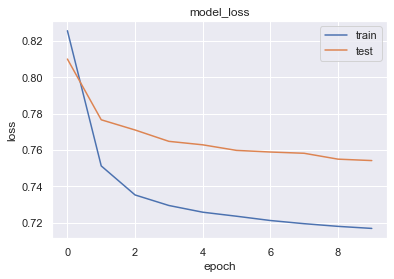

In [34]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper right');

In [35]:
prediction_auto=autoencoder.predict(X_test)

mse = np.mean(np.power(X_test - prediction_auto, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})

In [36]:
error_df

,reconstruction_error,true_class
40235,0.476202,0
99961,0.138656,0
106203,0.125630,0
2675,0.179147,0
219193,0.160486,0
...,...,...
220158,0.593338,0
238773,0.443871,0
106065,0.491046,0
106034,0.250386,0


In [123]:
error_df.describe()

,reconstruction_error,true_class
count,56962.000000,56962.000000
mean,0.730387,0.001703
std,3.568290,0.041231
min,0.033246,0.000000
25%,0.238155,0.000000
50%,0.385722,0.000000
75%,0.629272,0.000000
max,323.659171,1.000000


Reconstruction error

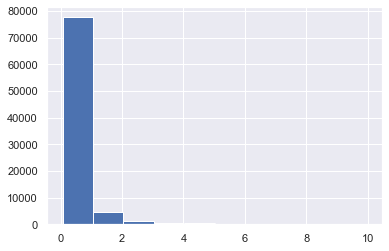

In [37]:
#reconstruction error on normal class
fig = plt.figure()
ax = fig.add_subplot(111)
normal_error_df = error_df[(error_df['true_class']== 0) & (error_df['reconstruction_error']<10)]
_ = ax.hist(normal_error_df.reconstruction_error.values, bins=10)

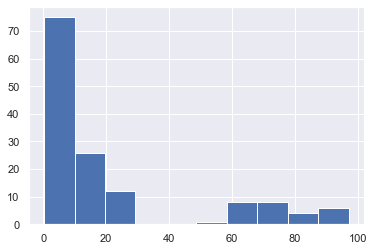

In [38]:
#reconstruction error on fraud class
fig = plt.figure()
ax = fig.add_subplot(111)
normal_error_df = error_df[(error_df['true_class']== 1)& (error_df['reconstruction_error']<100)]
_ = ax.hist(normal_error_df.reconstruction_error.values, bins=10)

<b>Prediction</b>

Autoencoder decodere model is different. 
It doesn't know how to predict new classes. But we don't need that. 

In order to predict whether or not a new/unseen transaction is normal or fraudulent, we'll calculate the reconstruction error from the transaction data itself. 
If the error is larger than a predefined threshold, we'll mark it as a fraud (since our model should have a low error on normal transactions). 

In [39]:
threshold = 2.5
LABELS = ['No Fraud', 'Fraud']

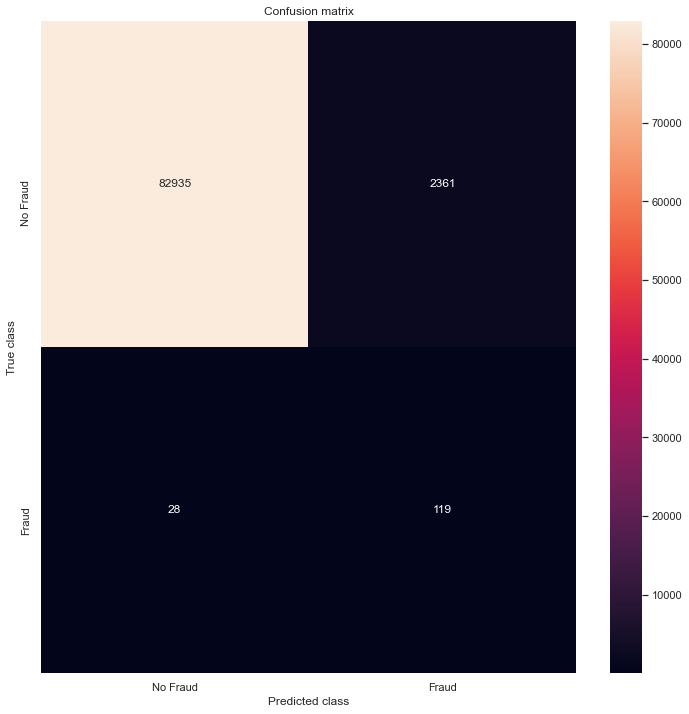

In [40]:
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [41]:
print('Auto Encoder:')
print(classification_report(error_df.true_class,y_pred))

Auto Encoder:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85296
           1       0.05      0.81      0.09       147

    accuracy                           0.97     85443
   macro avg       0.52      0.89      0.54     85443
weighted avg       1.00      0.97      0.98     85443

